<a href="https://colab.research.google.com/github/URK21CO3006/coderscave-CVIP-DataScience/blob/main/Final%20YEAR%20PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score,auc
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np







In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Galton_Data.csv')
df

Family  Father  Mother Gender  Height  Kids  MidParent
0         1    78.5    67.0      M    73.2     4      75.43
1         1    78.5    67.0      F    69.2     4      75.43
2         1    78.5    67.0      F    69.0     4      75.43
3         1    78.5    67.0      F    69.0     4      75.43
4         2    75.5    66.5      M    73.5     4      73.66
..      ...     ...     ...    ...     ...   ...        ...
893     136    68.5    65.0      M    68.5     8      69.35
894     136    68.5    65.0      M    67.7     8      69.35
895     136    68.5    65.0      F    64.0     8      69.35
896     136    68.5    65.0      F    63.5     8      69.35
897     136    68.5    65.0      F    63.0     8      69.35

[898 rows x 7 columns]

In [ ]:
df.head(10)

Family  Father  Mother Gender  Height  Kids  MidParent
0       1    78.5    67.0      M    73.2     4      75.43
1       1    78.5    67.0      F    69.2     4      75.43
2       1    78.5    67.0      F    69.0     4      75.43
3       1    78.5    67.0      F    69.0     4      75.43
4       2    75.5    66.5      M    73.5     4      73.66
5       2    75.5    66.5      M    72.5     4      73.66
6       2    75.5    66.5      F    65.5     4      73.66
7       2    75.5    66.5      F    65.5     4      73.66
8       3    75.0    64.0      M    71.0     2      72.06
9       3    75.0    64.0      F    68.0     2      72.06

In [ ]:
df.describe()

Family      Father      Mother      Height        Kids   MidParent
count  898.000000  898.000000  898.000000  898.000000  898.000000  898.000000
mean   104.601336   69.232851   64.084410   66.760690    6.135857   69.222007
std     56.479703    2.470256    2.307025    3.582918    2.685156    1.817757
min      1.000000   62.000000   58.000000   56.000000    1.000000   64.400000
25%     58.000000   68.000000   63.000000   64.000000    4.000000   68.060000
50%    105.000000   69.000000   64.000000   66.500000    6.000000   69.270000
75%    153.750000   71.000000   65.500000   69.700000    8.000000   70.160000
max    204.000000   78.500000   70.500000   79.000000   15.000000   75.430000

In [ ]:
df.drop_duplicates()

Family  Father  Mother Gender  Height  Kids  MidParent
0         1    78.5    67.0      M    73.2     4      75.43
1         1    78.5    67.0      F    69.2     4      75.43
2         1    78.5    67.0      F    69.0     4      75.43
4         2    75.5    66.5      M    73.5     4      73.66
5         2    75.5    66.5      M    72.5     4      73.66
..      ...     ...     ...    ...     ...   ...        ...
893     136    68.5    65.0      M    68.5     8      69.35
894     136    68.5    65.0      M    67.7     8      69.35
895     136    68.5    65.0      F    64.0     8      69.35
896     136    68.5    65.0      F    63.5     8      69.35
897     136    68.5    65.0      F    63.0     8      69.35

[786 rows x 7 columns]

In [ ]:
df.dropna()

Family  Father  Mother  Gender  Height  Kids  MidParent  \
0         1    78.5    67.0       0    73.2     4      75.43   
1         1    78.5    67.0       1    69.2     4      75.43   
2         1    78.5    67.0       1    69.0     4      75.43   
3         1    78.5    67.0       1    69.0     4      75.43   
4         2    75.5    66.5       0    73.5     4      73.66   
..      ...     ...     ...     ...     ...   ...        ...   
893     136    68.5    65.0       0    68.5     8      69.35   
894     136    68.5    65.0       0    67.7     8      69.35   
895     136    68.5    65.0       1    64.0     8      69.35   
896     136    68.5    65.0       1    63.5     8      69.35   
897     136    68.5    65.0       1    63.0     8      69.35   

     father_grandfather_height  father_grandmother_height  \
0                       74.575                     63.650   
1                       74.575                     63.650   
2                       74.575                     63.650   
3                       74.575                     63.650   
4                       71.725                     63.175   
..                         ...                        ...   
893                     76.720                     72.800   
894                     76.720                     72.800   
895                     76.720                     72.800   
896                     76.720                     72.800   
897                     76.720                     72.800   

     mother_grandfather_height  mother_grandmother_height  \
0                        75.36                      64.32   
1                        75.36                      64.32   
2                        75.36                      64.32   
3                        75.36                      64.32   
4                        72.48                      63.84   
..                         ...                        ...   
893                      75.35                      71.50   
894                      75.35                      71.50   
895                      75.35                      71.50   
896                      75.35                      71.50   
897                      75.35                      71.50   

     paternal_family_average  maternal_family_average  \
0                    69.1125                   69.840   
1                    69.1125                   69.840   
2                    69.1125                   69.840   
3                    69.1125                   69.840   
4                    67.4500                   68.160   
..                       ...                      ...   
893                  74.7600                   73.425   
894                  74.7600                   73.425   
895                  74.7600                   73.425   
896                  74.7600                   73.425   
897                  74.7600                   73.425   

     weighted_family_average  synthetic_age  
0                     70.131             11  
1                     70.131              9  
2                     70.131              9  
3                     70.131              9  
4                     68.444             11  
..                       ...            ...  
893                   72.624              9  
894                   72.624              9  
895                   72.624              7  
896                   72.624              7  
897                   72.624              7  

[898 rows x 15 columns]

In [ ]:
df.isnull()

Family  Father  Mother  Gender  Height   Kids  MidParent  \
0     False   False   False   False   False  False      False   
1     False   False   False   False   False  False      False   
2     False   False   False   False   False  False      False   
3     False   False   False   False   False  False      False   
4     False   False   False   False   False  False      False   
..      ...     ...     ...     ...     ...    ...        ...   
893   False   False   False   False   False  False      False   
894   False   False   False   False   False  False      False   
895   False   False   False   False   False  False      False   
896   False   False   False   False   False  False      False   
897   False   False   False   False   False  False      False   

     father_grandfather_height  father_grandmother_height  \
0                        False                      False   
1                        False                      False   
2                        False                      False   
3                        False                      False   
4                        False                      False   
..                         ...                        ...   
893                      False                      False   
894                      False                      False   
895                      False                      False   
896                      False                      False   
897                      False                      False   

     mother_grandfather_height  mother_grandmother_height  \
0                        False                      False   
1                        False                      False   
2                        False                      False   
3                        False                      False   
4                        False                      False   
..                         ...                        ...   
893                      False                      False   
894                      False                      False   
895                      False                      False   
896                      False                      False   
897                      False                      False   

     paternal_family_average  maternal_family_average  \
0                      False                    False   
1                      False                    False   
2                      False                    False   
3                      False                    False   
4                      False                    False   
..                       ...                      ...   
893                    False                    False   
894                    False                    False   
895                    False                    False   
896                    False                    False   
897                    False                    False   

     weighted_family_average  synthetic_age  
0                      False          False  
1                      False          False  
2                      False          False  
3                      False          False  
4                      False          False  
..                       ...            ...  
893                    False          False  
894                    False          False  
895                    False          False  
896                    False          False  
897                    False          False  

[898 rows x 15 columns]

In [ ]:
df.isnull().sum()

Family                       0
Father                       0
Mother                       0
Gender                       0
Height                       0
Kids                         0
MidParent                    0
father_grandfather_height    0
father_grandmother_height    0
mother_grandfather_height    0
mother_grandmother_height    0
paternal_family_average      0
maternal_family_average      0
weighted_family_average      0
synthetic_age                0
dtype: int64

In [ ]:
df['Gender']=df['Gender'].replace({'M':0,'F':1})
df['Gender']

<ipython-input-5-83c69ba9f733>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'M':0,'F':1})


0      0
1      1
2      1
3      1
4      0
      ..
893    0
894    0
895    1
896    1
897    1
Name: Gender, Length: 898, dtype: int64

In [ ]:
import pandas as pd

# Assuming 'df' is already loaded
# Example: df = pd.read_csv('original_dataset.csv')

# Define the ratios
father_grandfather_height_ratio_low = 0.95
father_grandfather_height_ratio_high = 1.12
father_grandmother_height_ratio_low = 0.95
father_grandmother_height_ratio_high = 1.12

mother_grandfather_height_ratio_low = 0.96
mother_grandfather_height_ratio_high = 1.10
mother_grandmother_height_ratio_low = 0.96
mother_grandmother_height_ratio_high = 1.10

# Create a copy of the dataframe for modifications
df1 = df.copy()

# Adjust father_grandfather_height
df1['father_grandfather_height'] = df['Father']
df1.loc[:451, 'father_grandfather_height'] *= father_grandfather_height_ratio_low
df1.loc[448:, 'father_grandfather_height'] *= father_grandfather_height_ratio_high

# Adjust father_grandmother_height
df1['father_grandmother_height'] = df['Mother']
df1.loc[:451, 'father_grandmother_height'] *= father_grandmother_height_ratio_low
df1.loc[448:, 'father_grandmother_height'] *= father_grandmother_height_ratio_high

# Adjust mother_grandfather_height
df1['mother_grandfather_height'] = df['Father']
df1.loc[:451, 'mother_grandfather_height'] *= mother_grandfather_height_ratio_low
df1.loc[448:, 'mother_grandfather_height'] *= mother_grandfather_height_ratio_high

# Adjust mother_grandmother_height
df1['mother_grandmother_height'] = df['Mother']
df1.loc[:451, 'mother_grandmother_height'] *= mother_grandmother_height_ratio_low
df1.loc[448:, 'mother_grandmother_height'] *= mother_grandmother_height_ratio_high

# Save the updated dataset to a new file
df1.to_csv('updated_dataset.csv', index=False)

# Print confirmation
print("The updated dataset has been saved as 'updated_dataset.csv'.")



The updated dataset has been saved as 'updated_dataset.csv'.


In [ ]:
print('Mean',df['Father'].mean())
print('Median',df['Father'].median())
print('Mode',df['Father'].mode())


Mean 69.23285077951002
Median 69.0
Mode 0    70.0
Name: Father, dtype: float64


In [ ]:
print('Mean',df['Mother'].mean())
print('Median',df['Mother'].median())
print('Mode',df['Mother'].mode())

Mean 64.08440979955456
Median 64.0
Mode 0    65.0
Name: Mother, dtype: float64


In [ ]:
Q1=df['Father'].quantile(.25)
Q3=df['Father'].quantile(.75)
print('IQR',Q3-Q1)
print(Q1)
print(Q3)


IQR 3.0
68.0
71.0


In [ ]:
Q1=df['Mother'].quantile(.25)
Q3=df['Mother'].quantile(.75)
print('IQR',Q3-Q1)
print(Q1)
print(Q3)

IQR 2.5
63.0
65.5


In [ ]:
Q1=df['Height'].quantile(.25)
Q3=df['Height'].quantile(.75)
print('IQR',Q3-Q1)

IQR 5.700000000000003


In [ ]:
Q1=df['MidParent'].quantile(.25)
Q3=df['MidParent'].quantile(.75)
print('IQR',Q3-Q1)

IQR 2.0999999999999943


In [ ]:
Q1=df1['father_grandfather_height'].quantile(.25)
Q3=df1['father_grandfather_height'].quantile(.75)
print('IQR',Q3-Q1)

IQR 8.710000000000008


In [ ]:
print('Mean',df1['father_grandfather_height'].mean())
print('Median',df1['father_grandfather_height'].median())
print('Mode',df1['father_grandfather_height'].mode())


Mean 71.49231069042317
Median 71.68
Mode 0    66.5
Name: father_grandfather_height, dtype: float64


In [ ]:
Q1=df['father_grandmother_height'].quantile(.25)
Q3=df['father_grandmother_height'].quantile(.75)
print('IQR',Q3-Q1)
print(Q1)
print(Q3)

IQR 10.405000000000008
61.275
71.68


In [ ]:
print('Mean',df1['father_grandmother_height'].mean())
print('Median',df1['father_grandmother_height'].median())
print('Mode',df1['father_grandmother_height'].mode())


Mean 66.28925167037862
Median 66.08000000000001
Mode 0    72.8
Name: father_grandmother_height, dtype: float64


In [ ]:
Zscore=stats.zscore(df['Father'])
print('Father zscore: ',Zscore)

Father zscore:  0      3.753584
1      3.753584
2      3.753584
3      3.753584
4      2.538458
         ...   
893   -0.296835
894   -0.296835
895   -0.296835
896   -0.296835
897   -0.296835
Name: Father, Length: 898, dtype: float64


In [ ]:
Zscore=stats.zscore(df['Mother'])
print('Mother Zscore is: ',Zscore)

Mother Zscore is:  0      1.264492
1      1.264492
2      1.264492
3      1.264492
4      1.047642
         ...   
893    0.397092
894    0.397092
895    0.397092
896    0.397092
897    0.397092
Name: Mother, Length: 898, dtype: float64


In [ ]:
Zscore=stats.zscore(df['Height'])
print('Height is: ',Zscore)

Height is:  0      1.798226
1      0.681196
2      0.625344
3      0.625344
4      1.882004
         ...   
893    0.485715
894    0.262309
895   -0.770944
896   -0.910573
897   -1.050201
Name: Height, Length: 898, dtype: float64


In [ ]:
Zscore=stats.zscore(df['MidParent'])
print('MidParent mean  is: ',Zscore)

MidParent mean  is:  0      3.417098
1      3.417098
2      3.417098
3      3.417098
4      2.442827
         ...   
893    0.070452
894    0.070452
895    0.070452
896    0.070452
897    0.070452
Name: MidParent, Length: 898, dtype: float64


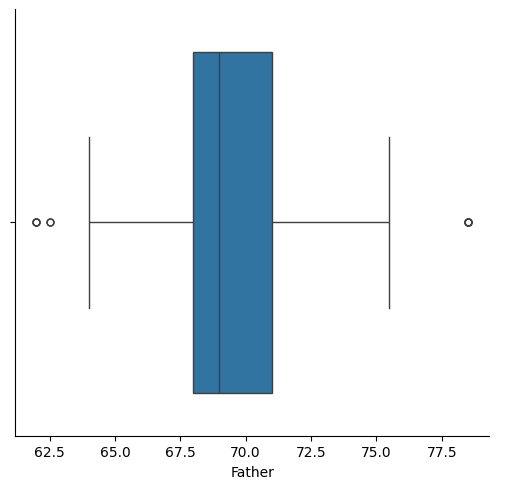

In [ ]:
sns.catplot(x='Father',kind='box',data=df)

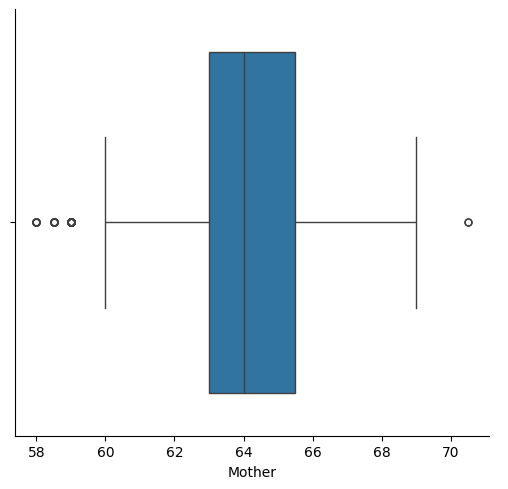

In [ ]:
sns.catplot(x='Mother',kind='box',data=df)

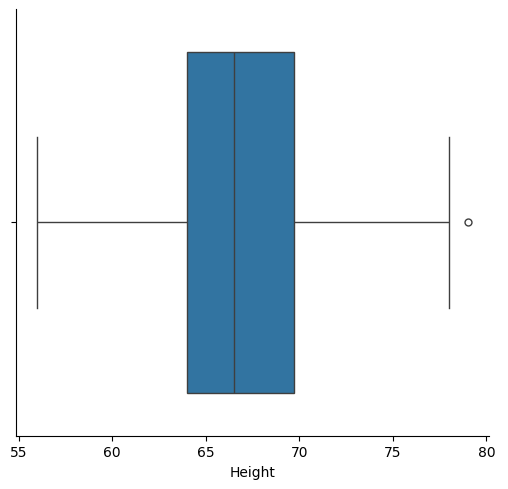

In [ ]:
sns.catplot(x='Height',kind='box',data=df)

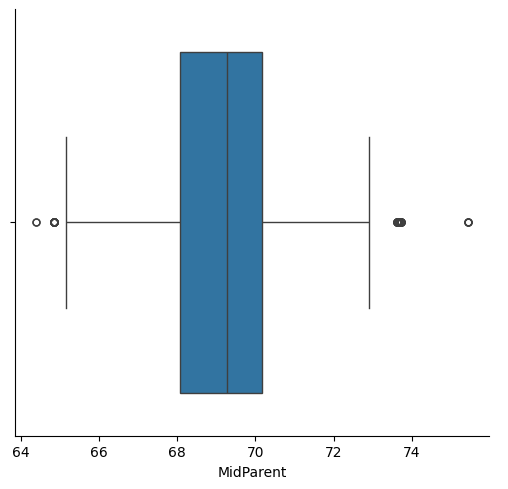

In [ ]:
sns.catplot(x='MidParent',kind='box',data=df)

In [ ]:
import pandas as pd
from scipy import stats



df = pd.read_csv('/content/drive/MyDrive/Galton_Data.csv')
z_scores = stats.zscore(df.select_dtypes(include=['int64', 'float64']))
threshold = 2
outliers = (z_scores > threshold) | (z_scores < -threshold)
df_no_outliers = df[~outliers.any(axis=1)]
print("Data without outliers:")



grandfather_height_ratio_low = 0.95
grandfather_height_ratio_high = 1.12
df_no_outliers['father_grandfather_height'] = df_no_outliers['Father']
df_no_outliers.loc[:451, 'father_grandfather_height'] *= father_grandfather_height_ratio_low
df_no_outliers.loc[448:, 'father_grandfather_height'] *= father_grandfather_height_ratio_high
df_no_outliers['father_grandmother_height'] = df_no_outliers['Mother']
df_no_outliers.loc[:451, 'father_grandmother_height'] *= father_grandmother_height_ratio_low
df_no_outliers.loc[448:, 'father_grandmother_height'] *= father_grandmother_height_ratio_high
print(df_no_outliers)


Data without outliers:
     Family  Father  Mother Gender  Height  Kids  MidParent  \
32       10    74.0    65.5      F    65.5     1      72.37   
34       11    74.0    62.0      M    70.0     8      70.48   
35       11    74.0    62.0      F    68.0     8      70.48   
36       11    74.0    62.0      F    67.0     8      70.48   
37       11    74.0    62.0      F    67.0     8      70.48   
..      ...     ...     ...    ...     ...   ...        ...   
893     136    68.5    65.0      M    68.5     8      69.35   
894     136    68.5    65.0      M    67.7     8      69.35   
895     136    68.5    65.0      F    64.0     8      69.35   
896     136    68.5    65.0      F    63.5     8      69.35   
897     136    68.5    65.0      F    63.0     8      69.35   

     father_grandfather_height  father_grandmother_height  
32                       70.30                     62.225  
34                       70.30                     58.900  
35                       70.30          

<ipython-input-7-30e741b341f9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['father_grandfather_height'] = df_no_outliers['Father']
<ipython-input-7-30e741b341f9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['father_grandmother_height'] = df_no_outliers['Mother']


In [ ]:
print('Mean',df_no_outliers['Father'].mean())
print('Median',df_no_outliers['Father'].median())
print('Mode',df_no_outliers['Father'].mode())



Mean 69.18944591029023
Median 69.0
Mode 0    69.0
Name: Father, dtype: float64


In [ ]:
print('Mean',df_no_outliers['Mother'].mean())
print('Median',df_no_outliers['Mother'].median())
print('Mode',df_no_outliers['Mother'].mode())


Mean 64.18654353562006
Median 64.0
Mode 0    65.0
Name: Mother, dtype: float64


In [ ]:
Q1=df_no_outliers['Father'].quantile(.25)
Q3=df_no_outliers['Father'].quantile(.75)
print('IQR',Q3-Q1)
print(Q1)
print(Q3)

IQR 2.5
68.0
70.5


In [ ]:
Q1=df_no_outliers['father_grandfather_height'].quantile(.25)
Q3=df_no_outliers['father_grandfather_height'].quantile(.75)
print('IQR',Q3-Q1)
print(Q1)
print(Q3)


IQR 9.185000000000016
66.975
76.16000000000001


In [ ]:
Q1=df_no_outliers['father_grandmother_height'].quantile(.25)
Q3=df_no_outliers['father_grandmother_height'].quantile(.75)
print('IQR',Q3-Q1)
print(Q1)
print(Q3)


IQR 10.405000000000008
61.275
71.68


In [ ]:
print('Mean',df_no_outliers['father_grandfather_height'].mean())
print('Median',df_no_outliers['father_grandfather_height'].median())
print('Mode',df_no_outliers['father_grandfather_height'].mode())

Mean 71.58106464379948
Median 72.80000000000001
Mode 0    66.5
Name: father_grandfather_height, dtype: float64


In [ ]:
print('Mean',df_no_outliers['father_grandmother_height'].mean())
print('Median',df_no_outliers['father_grandmother_height'].median())
print('Mode',df_no_outliers['father_grandmother_height'].mode())

Mean 66.51782058047493
Median 67.2
Mode 0    72.8
Name: father_grandmother_height, dtype: float64


In [ ]:
Q1=df_no_outliers['Mother'].quantile(.25)
Q3=df_no_outliers['Mother'].quantile(.75)
print('IQR',Q3-Q1)
print(Q1)
print(Q3)

IQR 2.5
63.0
65.5


IQR 3.0
Mean 69.23285077951002
Median 69.0
Mode 0    70.0
Name: Father, dtype: float64


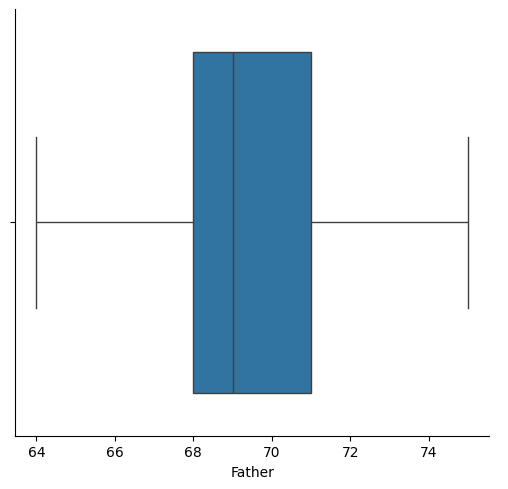

In [ ]:
Q1=df['Father'].quantile(.25)
Q3=df['Father'].quantile(.75)
IQR=Q3-Q1
print('IQR',Q3-Q1)
lb=Q1-1.5*IQR

ub=Q3+1.5*IQR

dfout=df[(df['Father']>lb) & (df['Father']<ub) ]
dfout.shape
dfout.tail()
sns.catplot(x='Father',kind='box',data=dfout)
print('Mean',df['Father'].mean())
print('Median',df['Father'].median())
print('Mode',df['Father'].mode())


IQR 2.5


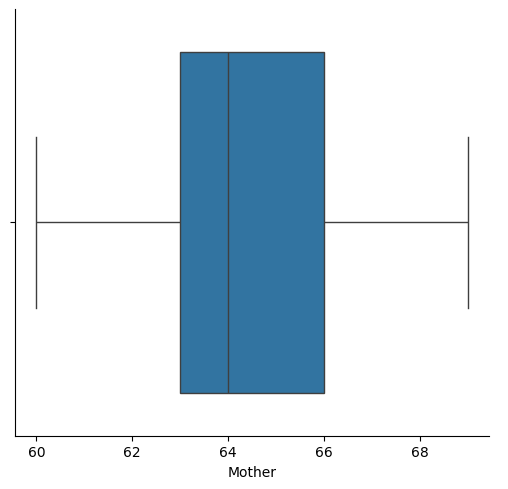

In [ ]:
Q1=df['Mother'].quantile(.25)
Q3=df['Mother'].quantile(.75)
IQR=Q3-Q1
print('IQR',Q3-Q1)
lb=Q1-1.5*IQR

ub=Q3+1.5*IQR

dfout=df[(df['Mother']>lb) & (df['Mother']<ub) ]
dfout.shape
dfout.tail()
sns.catplot(x='Mother',kind='box',data=dfout)

IQR 5.700000000000003


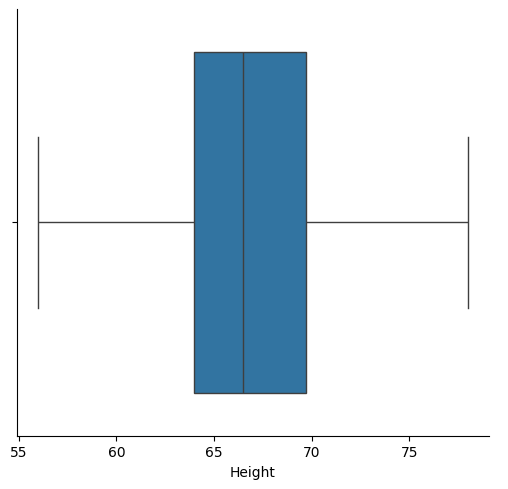

In [ ]:
Q1=df['Height'].quantile(.25)
Q3=df['Height'].quantile(.75)
IQR=Q3-Q1
print('IQR',Q3-Q1)
lb=Q1-1.5*IQR

ub=Q3+1.5*IQR

dfout=df[(df['Height']>lb) & (df['Height']<ub) ]
dfout.shape
dfout.tail()
sns.catplot(x='Height',kind='box',data=dfout)

IQR 2.0999999999999943


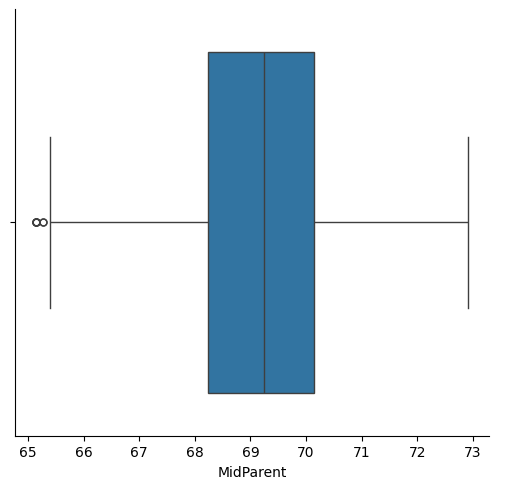

In [ ]:
Q1=df['MidParent'].quantile(.25)
Q3=df['MidParent'].quantile(.75)
IQR=Q3-Q1
print('IQR',Q3-Q1)
lb=Q1-1.5*IQR

ub=Q3+1.5*IQR

dfout=df[(df['MidParent']>lb) & (df['MidParent']<ub) ]
dfout.shape
dfout.tail()
sns.catplot(x='MidParent',kind='box',data=dfout)

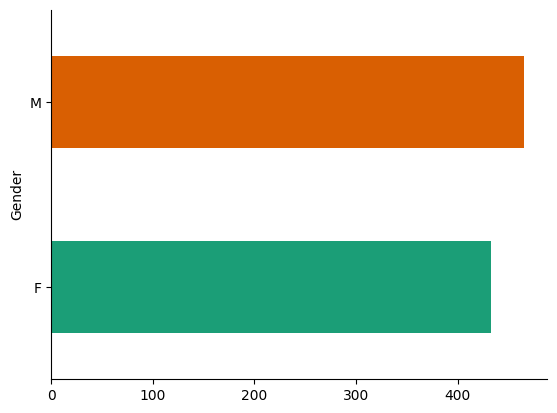

In [ ]:
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0, 0.5, 'Number of kids')

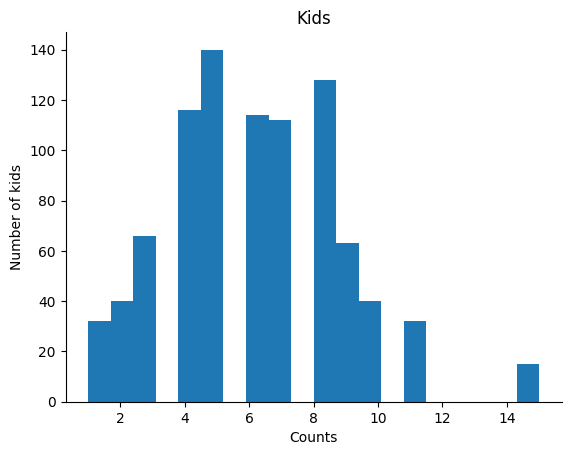

In [ ]:
df['Kids'].plot(kind='hist', bins=20, title='Kids')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Counts')
plt.ylabel('Number of kids')

pearsons correlation:  0.2753548262521486


Text(0, 0.5, "Child's height")

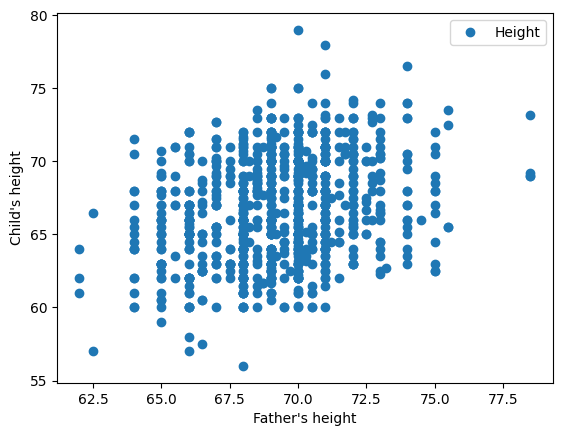

In [ ]:
df.plot("Father",'Height',style='o')
print('pearsons correlation: ',df['Father'].corr(df['Height']))
plt.xlabel("Father's height")
plt.ylabel("Child's height")

pearsons correlation:  0.2753548262521486


Text(0, 0.5, "Child's height(inches)")

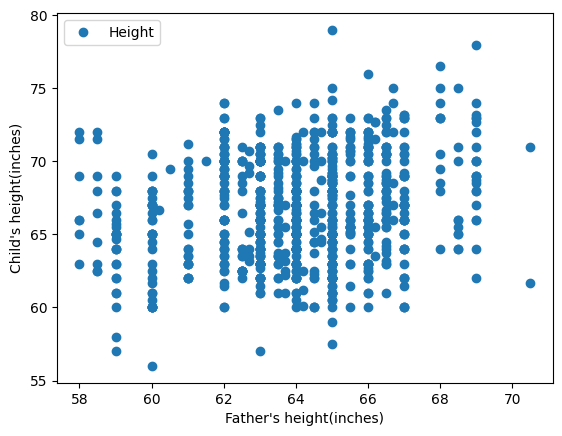

In [ ]:
df.plot("Mother",'Height',style='o')
print('pearsons correlation: ',df['Father'].corr(df['Height']))
plt.xlabel("Mother's height(inches)")
plt.ylabel("Child's height(inches)")

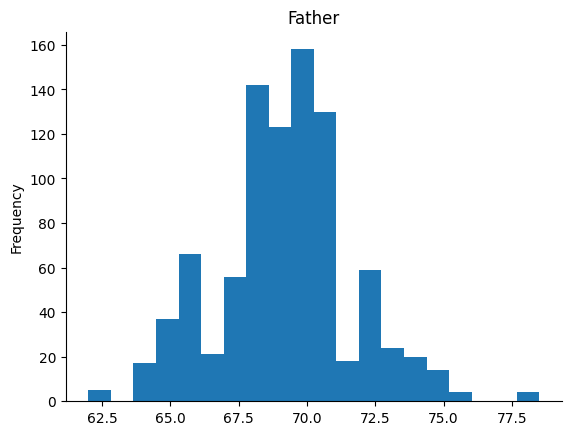

In [ ]:
df['Father'].plot(kind='hist', bins=20, title='Father')
plt.gca().spines[['top', 'right',]].set_visible(False)

pearsons correlation:  0.2016548939048627


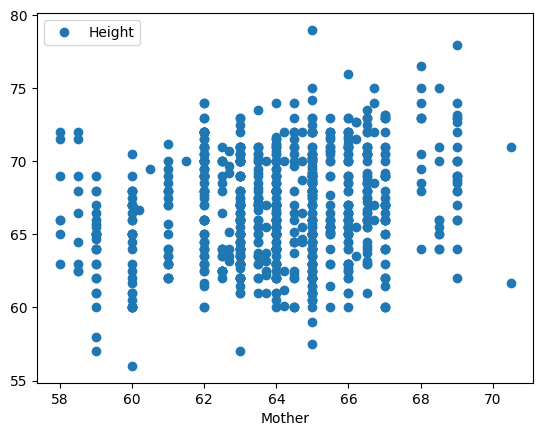

In [ ]:
df.plot("Mother",'Height',style='o')
print('pearsons correlation: ',df['Mother'].corr(df['Height']))

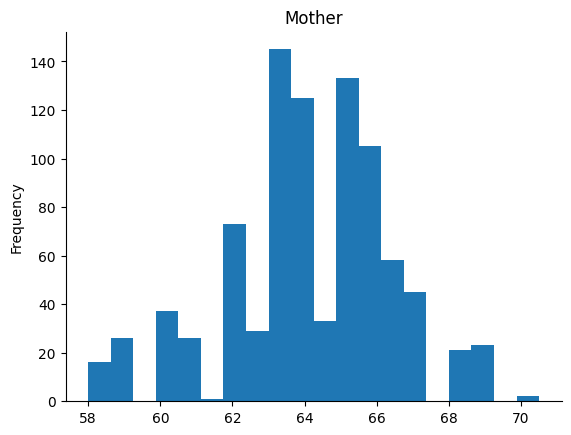

In [ ]:
df['Mother'].plot(kind='hist', bins=20, title='Mother')
plt.gca().spines[['top', 'right',]].set_visible(False)

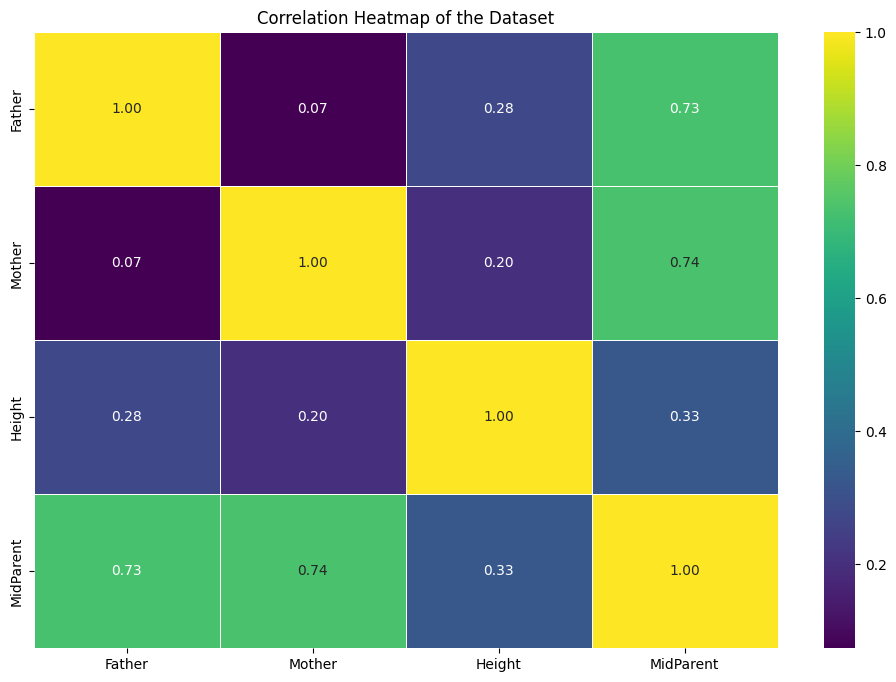

In [ ]:
subset_df = df[['Father', 'Mother', 'Height', 'MidParent']]
corr_matrix = subset_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of the Dataset')
plt.show()



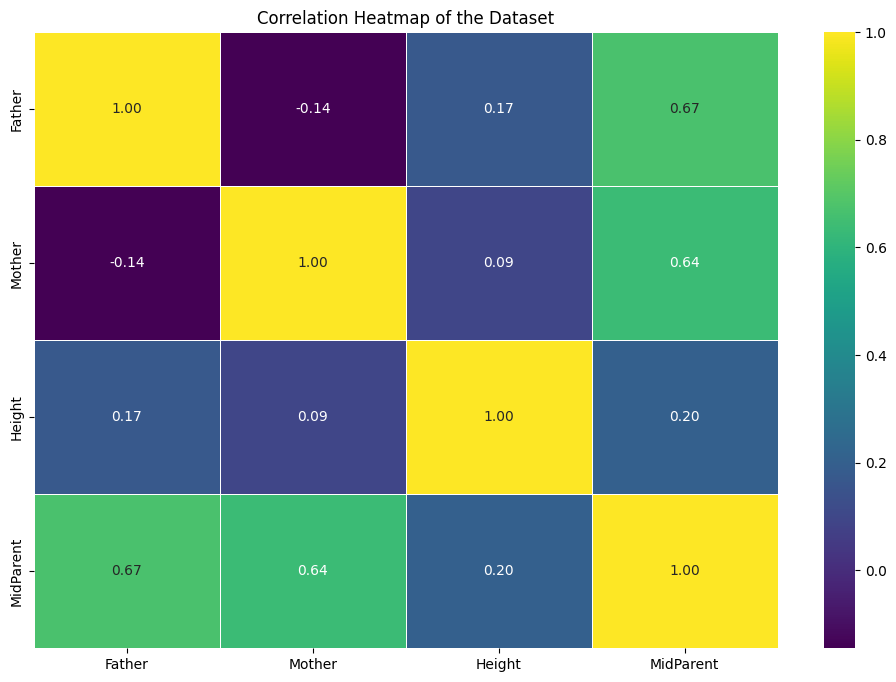

In [ ]:
subset_df = df_no_outliers[['Father', 'Mother', 'Height', 'MidParent']]
corr_matrix = subset_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of the Dataset')
plt.show()


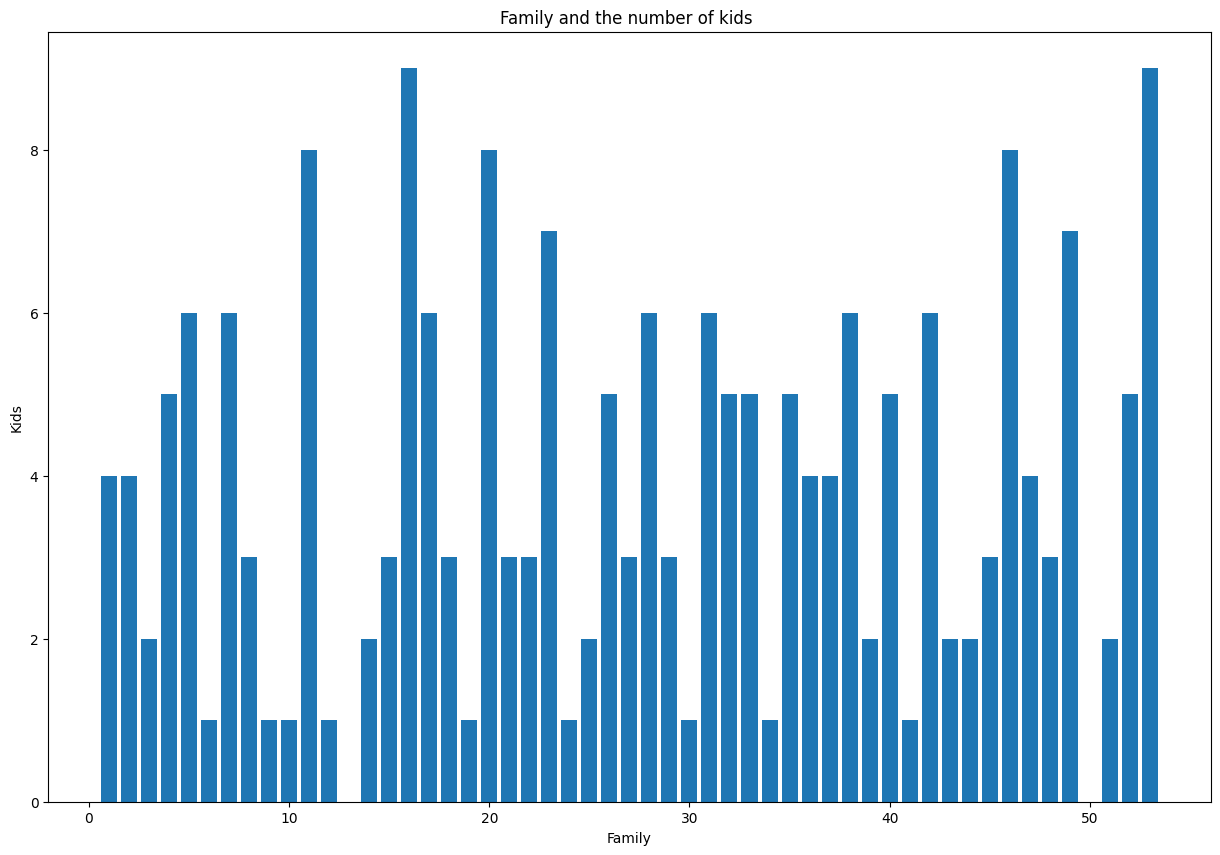

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(df['Family'].head(200),df['Kids'].head(200))
plt.title("Family and the number of kids ")
plt.xlabel('Family')
plt.ylabel('Kids')
plt.show()

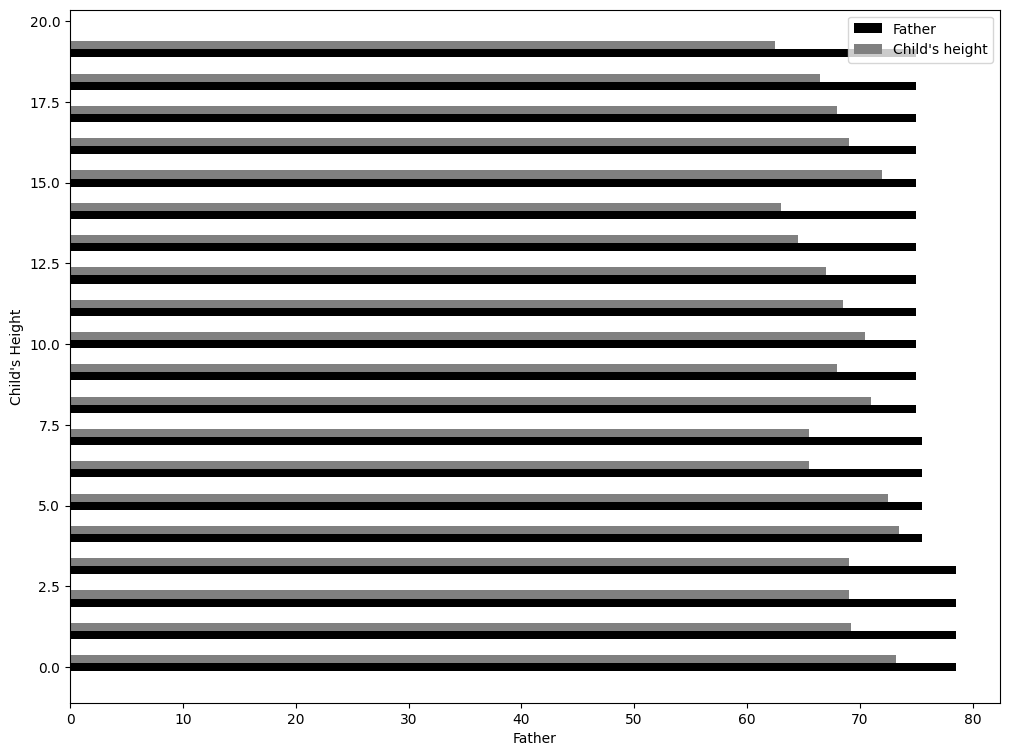

In [ ]:
N=20
plt.figure(figsize=(12,9))
ind=np.arange(N)
width = 0.25
xval=df['Father'].head(20)
bar1=plt.barh(ind,xval,width,color='black',label="Father")
plt.xlabel('Father')

yval=df['Height'].head(20)
plt.ylabel("Child's Height")
bar2=plt.barh(ind+width,yval,width,color='grey',label="Child's height")
plt.legend()

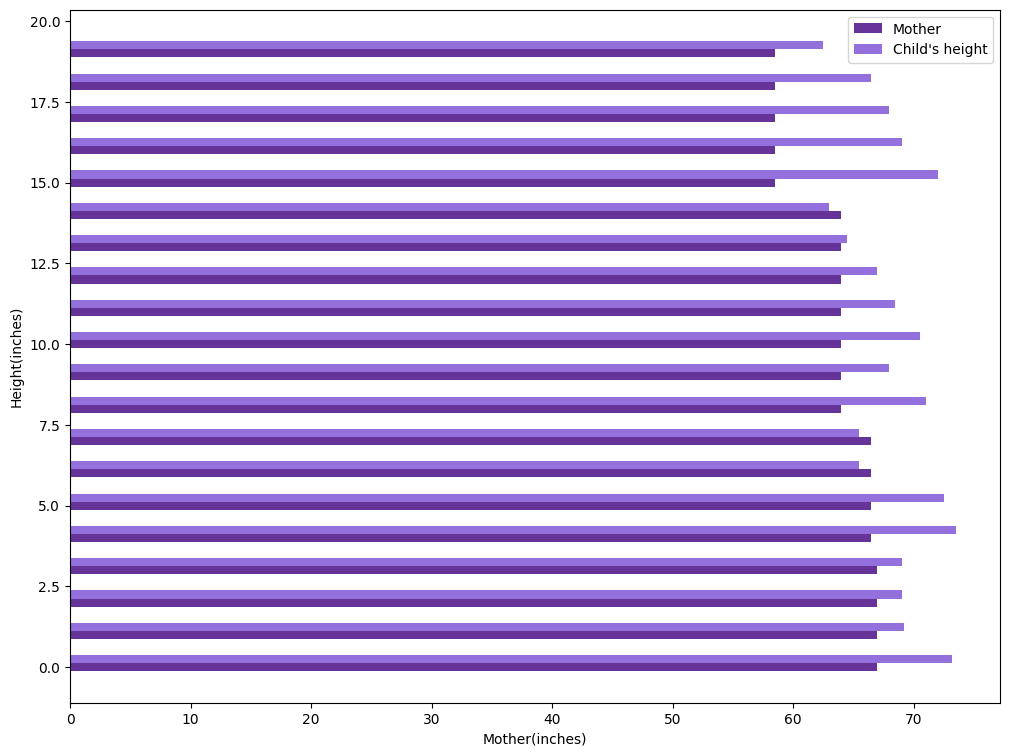

In [ ]:
N=20
plt.figure(figsize=(12,9))
ind=np.arange(N)
width = 0.25
xval=df['Mother'].head(20)
bar1=plt.barh(ind,xval,width,color='rebeccapurple',label='Mother')
plt.xlabel('Mother(inches)')

yval=df['Height'].head(20)
plt.ylabel('Height(inches)')
bar2=plt.barh(ind+width,yval,width,color='mediumpurple',label="Child's height")
plt.legend()

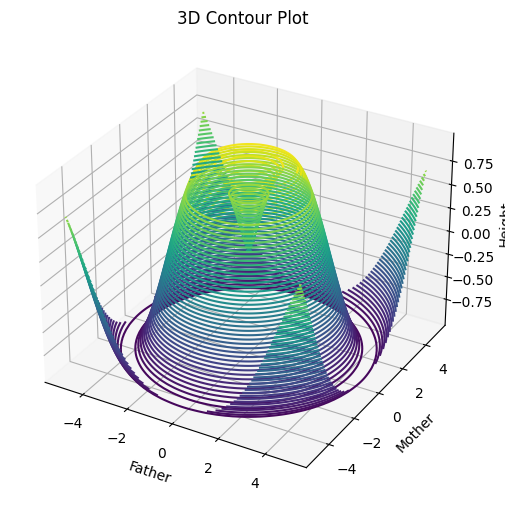

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))
fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot(111, projection='3d')
contour = ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('Father')
ax.set_ylabel('Mother')
ax.set_zlabel('Height', labelpad=4)
ax.set_title('3D Contour Plot')

plt.show()


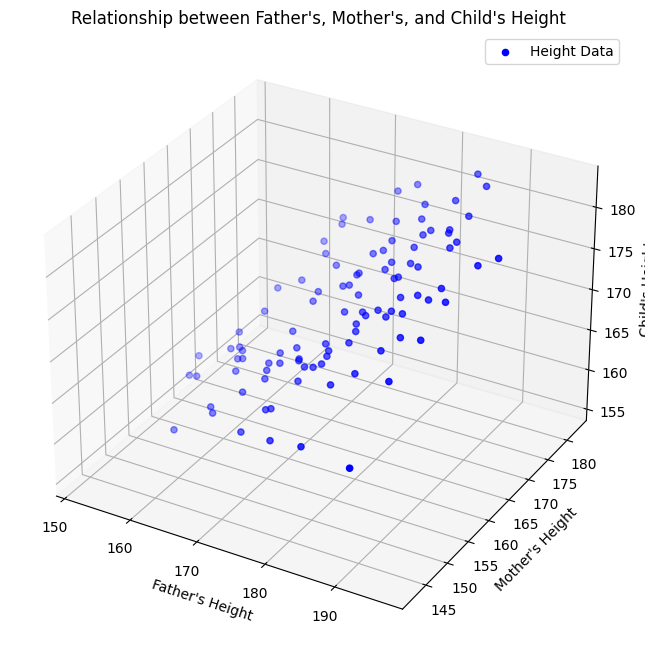

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


father_height = np.random.normal(175, 10, 100)
mother_height = np.random.normal(165, 8, 100)
child_height = father_height * 0.5 + mother_height * 0.5

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(father_height, mother_height, child_height, c='b', marker='o', label='Height Data')


ax.set_xlabel("Father's Height")
ax.set_ylabel("Mother's Height")
ax.set_zlabel("Child's Height")
ax.set_title("Relationship between Father's, Mother's, and Child's Height")


ax.legend()

plt.show()


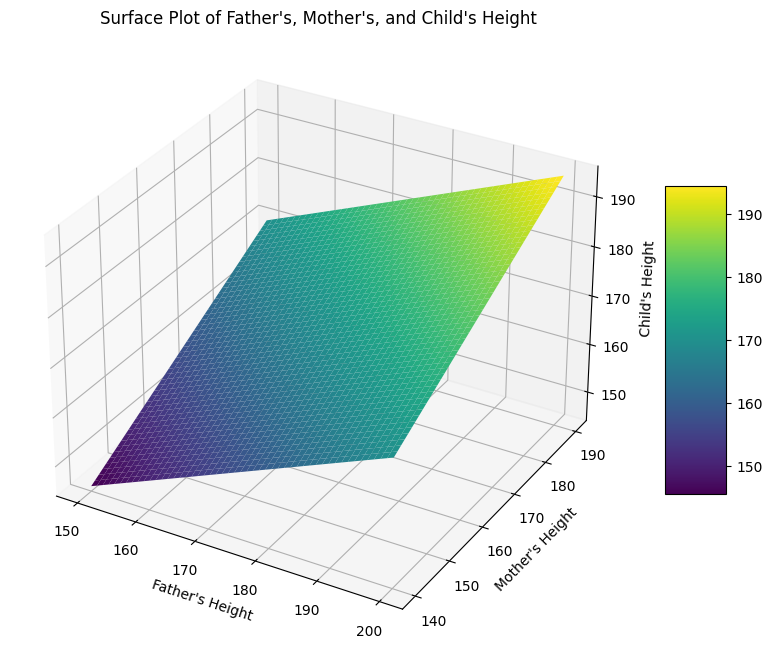

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


father_height = np.linspace(150, 200, 50)
mother_height = np.linspace(140, 190, 50)
father_height, mother_height = np.meshgrid(father_height, mother_height)
child_height = 0.5 * father_height + 0.5 * mother_height

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


surf = ax.plot_surface(father_height, mother_height, child_height, cmap='viridis')


ax.set_xlabel("Father's Height")
ax.set_ylabel("Mother's Height")
ax.set_zlabel("Child's Height")
ax.set_title("Surface Plot of Father's, Mother's, and Child's Height")

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


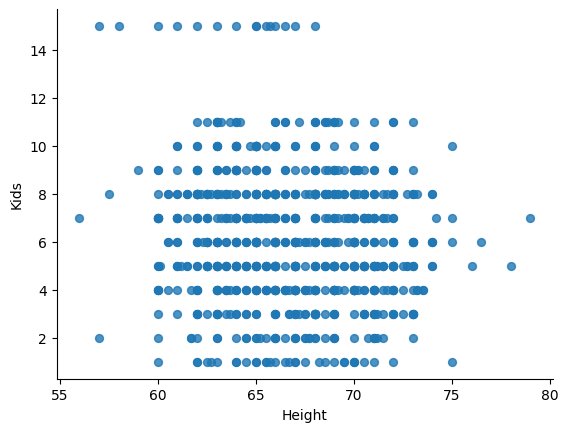

In [ ]:
df.plot(kind='scatter', x='Height', y='Kids', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

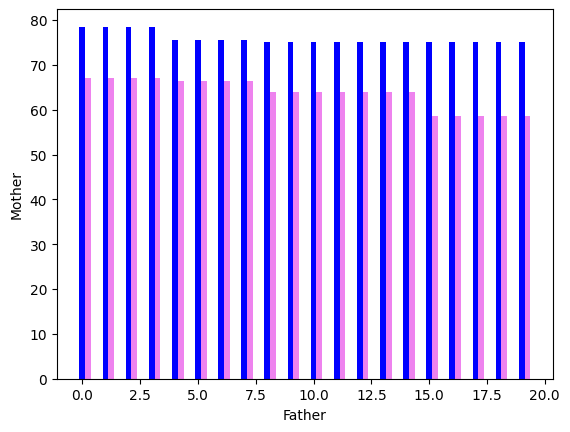

In [ ]:
N=20
ind=np.arange(N)
width = 0.25
xval=df['Father'].head(20)
bar1=plt.bar(ind,xval,width,color='blue')
plt.xlabel('Father')

yval=df['Mother'].head(20)
plt.ylabel('Mother')
bar2=plt.bar(ind+width,yval,width,color='violet')

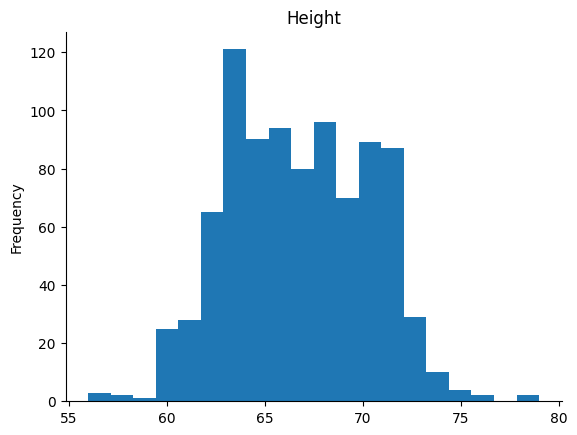

In [ ]:
from matplotlib import pyplot as plt
df['Height'].plot(kind='hist', bins=20, title='Height')
plt.gca().spines[['top', 'right',]].set_visible(False)

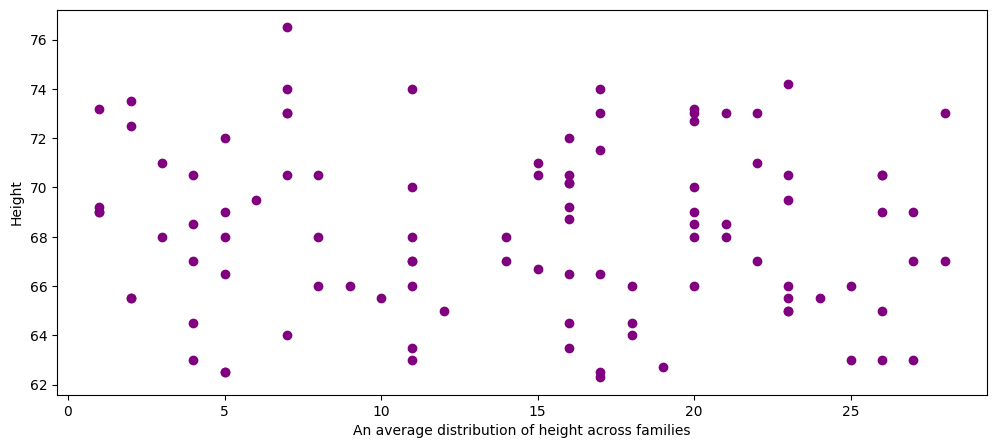

In [ ]:
plt.figure(figsize=(12,5))
x=df['Family'].head(100)
plt.xlabel('An average distribution of height across families')
plt.ylabel('Height')
y=df['Height'].head(100)
plt.scatter(x,y,c='purple')

<Axes: xlabel='Height'>

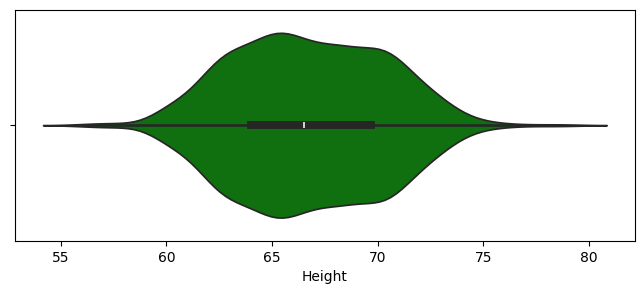

In [ ]:
plt.figure(figsize=(8,3))
sns.violinplot(x="Height", data=df, color="green")


<Axes: xlabel='MidParent'>

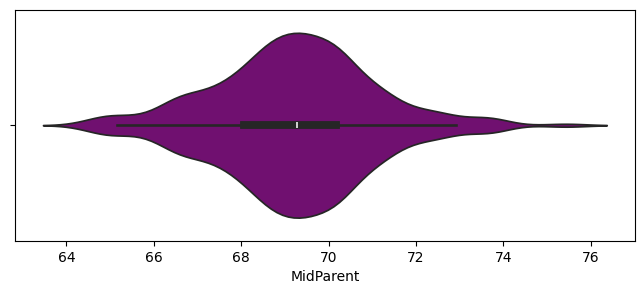

In [ ]:
plt.figure(figsize=(8,3))
sns.violinplot(x="MidParent", data=df, color="purple")

<Figure size 100x300 with 0 Axes>

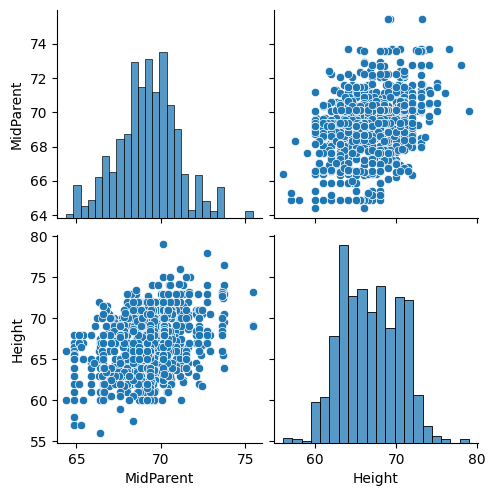

In [ ]:
plt.figure(figsize=(1,3))
Mul = df[["MidParent","Height"]]

sns.pairplot(data=Mul);

<Figure size 100x300 with 0 Axes>

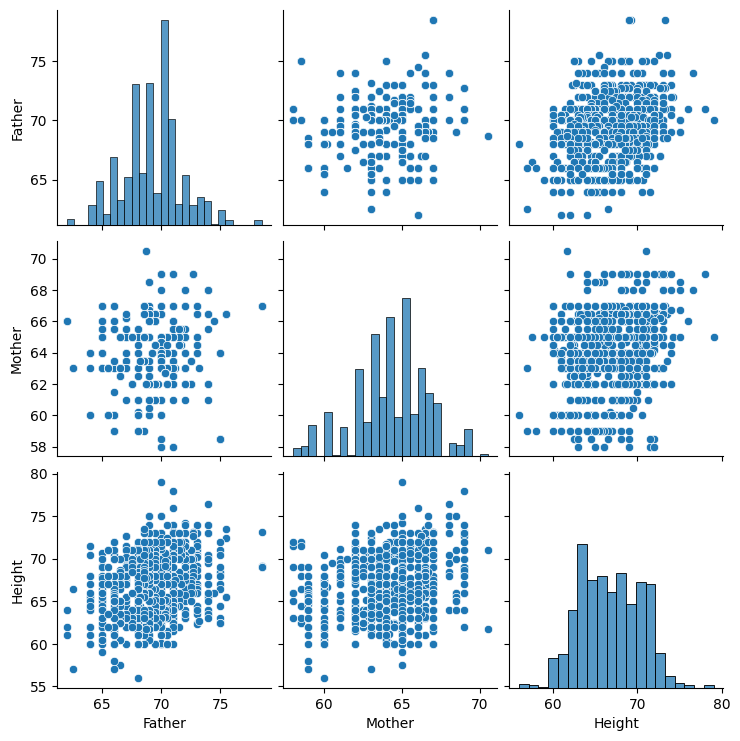

In [ ]:
plt.figure(figsize=(1,3))
Mul = df[["Father","Mother","Height"]]

sns.pairplot(data=Mul);

In [ ]:
import pandas as pd

# Function to calculate paternal and maternal averages and add them to the dataset
def calculate_paternal_maternal_averages(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Check if the required columns exist
    required_columns = [
        "father_grandfather_height",
        "father_grandmother_height",
        "mother_grandfather_height",
        "mother_grandmother_height"
    ]
    for column in required_columns:
        if column not in df.columns:
            raise ValueError(f"Column '{column}' is missing in the dataset.")

    # Calculate paternal family average (father's side)
    df["paternal_family_average"] = (
        df["father_grandfather_height"] + df["father_grandmother_height"]
    ) / 2

    # Calculate maternal family average (mother's side)
    df["maternal_family_average"] = (
        df["mother_grandfather_height"] + df["mother_grandmother_height"]
    ) / 2

    return df

# Function to calculate and update the weighted family average in the dataset
def update_and_export_full_dataset_with_weighted_average(file_path, output_path):
    # Calculate paternal and maternal averages first
    df = calculate_paternal_maternal_averages(file_path)

    # Check if the required columns exist
    required_columns = [
        "paternal_family_average",  # Paternal family average
        "maternal_family_average",  # Maternal family average
        "Father",                   # Father's height
        "Mother"                    # Mother's height
    ]
    for column in required_columns:
        if column not in df.columns:
            raise ValueError(f"Column '{column}' is missing in the dataset.")

    # Define weights
    w_paternal = 0.4  # Weight for paternal family average
    w_maternal = 0.4  # Weight for maternal family average
    w_parents = 0.2   # Weight for direct parents (Father and Mother)

    # Calculate the weighted family average
    df["weighted_family_average"] = (
        df["paternal_family_average"] * w_paternal +
        df["maternal_family_average"] * w_maternal +
        (df["Father"] + df["Mother"]) / 2 * w_parents
    )

    # Save the updated dataset with all columns
    df.to_csv(output_path, index=False)
    print(f"Updated dataset with weighted family average saved to {output_path}")

# File paths
input_file_path = "/content/updated_dataset.csv"  # Input dataset file path
output_file_path = "/content/updated_dataset_with_weighted_average.csv"  # Output file path

# Call the function
try:
    update_and_export_full_dataset_with_weighted_average(input_file_path, output_file_path)
except Exception as e:
    print(f"An error occurred: {e}")



Updated dataset with weighted family average saved to /content/updated_dataset_with_weighted_average.csv


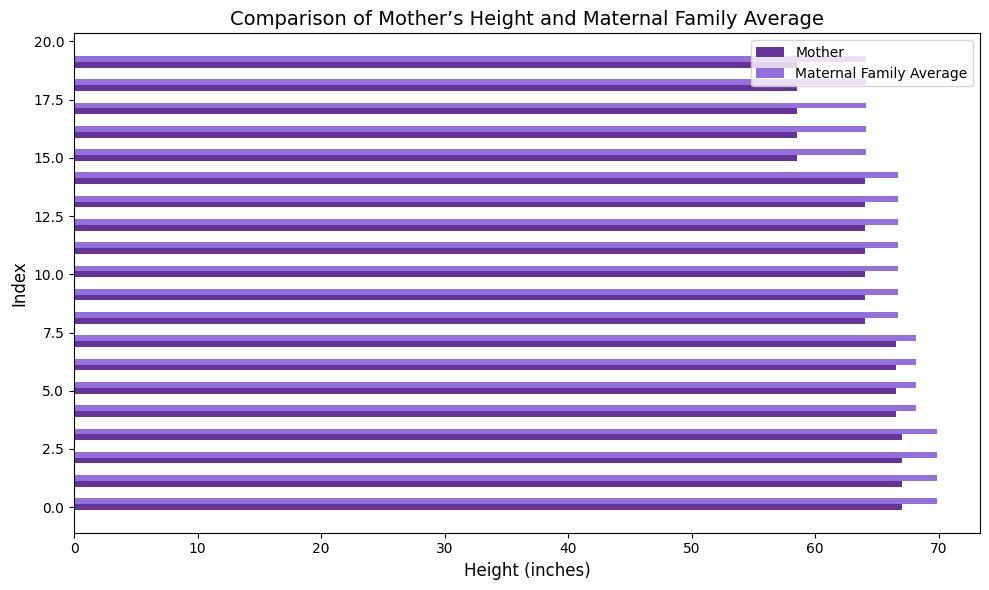

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the CSV file is already loaded as a DataFrame
df2 = pd.read_csv("/content/updated_dataset_with_weighted_average.csv")

# Variables
N = 20  # Number of entries to visualize
ind = np.arange(N)  # Index for bars
width = 0.25  # Width of the bars

# Data for the chart
xval = df2['Mother'].head(20)
yval = df2['maternal_family_average'].head(20)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bar1 = plt.barh(ind, xval, width, color='rebeccapurple', label='Mother')
bar2 = plt.barh(ind + width, yval, width, color='mediumpurple', label='Maternal Family Average')

# Adding labels and title
plt.xlabel('Height (inches)', fontsize=12)
plt.ylabel('Index', fontsize=12)
plt.title('Comparison of Mother’s Height and Maternal Family Average', fontsize=14)

plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/updated_dataset_with_weighted_average.csv'
df = pd.read_csv(file_path)

# Function to estimate age based on height
def estimate_age(height, gender):
    """
    Estimate synthetic age based on child's height and gender.
    """
    # Define average height ranges for children by age (example lookup table)
    # Source: Approximate values from growth charts
    height_to_age = {
        "male": {60: 5, 65: 7, 70: 9, 75: 11, 80: 13, 85: 15, 90: 17},
        "female": {60: 5, 65: 7, 70: 9, 75: 11, 80: 13, 85: 15, 90: 17},
    }

    # Determine gender-based height-to-age mapping
    gender_key = "male" if gender == 0 else "female"
    age_map = height_to_age[gender_key]

    # Find the closest height bucket for the given height
    closest_height = min(age_map.keys(), key=lambda x: abs(x - height))

    # Base age from lookup table
    base_age = age_map[closest_height]

    # Add random noise for variation
    noise = np.random.uniform(-0.5, 0.5)  # +/- 0.5 years
    return round(base_age + noise)  # Round to the nearest integer

# Generate the synthetic age column
df["synthetic_age"] = df.apply(lambda row: estimate_age(row["Height"], row["Gender"]), axis=1)

# Save the updated dataset
output_file_path = '/content/updated_dataset_with_synthetic_age.csv'
df.to_csv(output_file_path, index=False)

print(f"Updated dataset with synthetic age saved to {output_file_path}")


Updated dataset with synthetic age saved to /content/updated_dataset_with_synthetic_age.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
file_path = '/content/updated_dataset_with_synthetic_age.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Reset index to avoid index issues
df = df.reset_index(drop=True)

# Define feature and target columns
feature_columns = ["Gender","synthetic_age"]  # Independent variables
target_column = "Height"  # Dependent variable

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Extract X and y for training and testing
x_train = train_df[feature_columns].values  # Features for training
y_train = train_df[target_column].values    # Target for training
x_test = test_df[feature_columns].values    # Features for testing
y_test = test_df[target_column].values      # Target for testing

model = LinearRegression()

model.fit(x_train, y_train)


def calculate_cosine_similarity(df, feature_columns, child_index, top_n):

    child_feature = np.array(df.iloc[child_index][feature_columns]).reshape(1, -1)
    all_features = df[feature_columns].values
    similarities = cosine_similarity(child_feature, all_features).flatten()


    top_indices = np.argsort(-similarities)[:top_n + 1]
    top_indices = [idx for idx in top_indices if idx != child_index][:top_n]
    return top_indices


def predict_gcc_linear_regression(df, model, feature_columns, target_column, top_n):
    predictions = []
    for idx in range(len(df)):

        similar_indices = calculate_cosine_similarity(df, feature_columns, idx, top_n)
        similar_data = df.iloc[similar_indices]


        X_train = similar_data[feature_columns].values
        y_train = similar_data[target_column].values

        local_model = LinearRegression()
        local_model.fit(X_train, y_train)


        child_feature = np.array(df.iloc[idx][feature_columns]).reshape(1, -1)
        predictions.append(local_model.predict(child_feature)[0])

    return predictions

top_n = 5

gcc_predictions = predict_gcc_linear_regression(test_df, model, feature_columns, target_column, top_n)


print("Predictions using GCC completed!")




Predictions using GCC completed!


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def evaluate_gcc_predictions(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print("Evaluation Metrics for GCC Predictions:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    return mae, mse, rmse, r2

gcc_mae, gcc_mse, gcc_rmse, gcc_r2 = evaluate_gcc_predictions(y_test, gcc_predictions)


Evaluation Metrics for GCC Predictions:
Mean Absolute Error (MAE): 1.08
Mean Squared Error (MSE): 1.79
Root Mean Squared Error (RMSE): 1.34
R² Score: 0.85


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import KBinsDiscretizer

# Define the number of bins (categories) for height classification
num_bins = 3  # You can choose 2 for binary classification or more for multi-class
binning = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')

# Fit binning on actual heights and transform both actual and predicted heights
y_test_binned = binning.fit_transform(y_test.reshape(-1, 1)).flatten()
gcc_predictions_binned = binning.transform(np.array(gcc_predictions).reshape(-1, 1)).flatten()

# Calculate classification metrics
accuracy = accuracy_score(y_test_binned, gcc_predictions_binned)
f1 = f1_score(y_test_binned, gcc_predictions_binned, average='weighted')
precision = precision_score(y_test_binned, gcc_predictions_binned, average='weighted')
recall = recall_score(y_test_binned, gcc_predictions_binned, average='weighted')

# Print the metrics
print("Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


InvalidParameterError: The 'average' parameter of f1_score must be a str among {'weighted', 'samples', 'micro', 'binary', 'macro'} or None. Got 'synthetic_age' instead.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
file_path = '/content/updated_dataset_with_synthetic_age.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Reset index to avoid index issues
df = df.reset_index(drop=True)

# Define feature and target columns
feature_columns = ["Gender", "synthetic_age"]  # Independent variables
target_column = "Height"  # Dependent variable

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Extract X and y for training and testing
x_train = train_df[feature_columns].values  # Features for training
y_train = train_df[target_column].values    # Target for training
x_test = test_df[feature_columns].values    # Features for testing
y_test = test_df[target_column].values      # Target for testing

# Initialize the SVM model with a linear kernel
svm_model = SVR(kernel="linear")

# Train the SVM model on the training data
svm_model.fit(x_train, y_train)

# Function to calculate cosine similarity and find top N similar individuals
def calculate_cosine_similarity(df, feature_columns, child_index, top_n):
    # Extract features for the child and all individuals
    child_feature = np.array(df.iloc[child_index][feature_columns]).reshape(1, -1)
    all_features = df[feature_columns].values
    similarities = cosine_similarity(child_feature, all_features).flatten()

    # Get indices of top N similar individuals
    top_indices = np.argsort(-similarities)[:top_n + 1]  # Include the child itself
    top_indices = [idx for idx in top_indices if idx != child_index][:top_n]  # Exclude child itself
    return top_indices

# Function to predict heights using GCC with SVM
def predict_gcc_svm(df, model, feature_columns, target_column, top_n):
    predictions = []
    for idx in range(len(df)):
        # Get top N similar individuals
        similar_indices = calculate_cosine_similarity(df, feature_columns, idx, top_n)
        similar_data = df.iloc[similar_indices]

        # Define X_train and y_train from the similar individuals
        X_train = similar_data[feature_columns].values
        y_train = similar_data[target_column].values

        # Train a local SVM model with linear kernel on top N similar individuals
        local_model = SVR(kernel="linear")
        local_model.fit(X_train, y_train)

        # Predict for the child
        child_feature = np.array(df.iloc[idx][feature_columns]).reshape(1, -1)
        predictions.append(local_model.predict(child_feature)[0])

    return predictions

# Define top N similar individuals
top_n = 5

# Predict heights using GCC with SVM
gcc_predictions = predict_gcc_svm(test_df, svm_model, feature_columns, target_column, top_n)

# Print confirmation
print("Predictions using GCC with SVM completed!")

# Evaluate the GCC predictions
def evaluate_gcc_predictions(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_true, y_pred)

    print("\nEvaluation Metrics for GCC Predictions with SVM:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    return mae, mse, rmse, r2

# Evaluate the GCC predictions against actual test targets
gcc_mae, gcc_mse, gcc_rmse, gcc_r2 = evaluate_gcc_predictions(y_test, gcc_predictions)


Predictions using GCC with SVM completed!

Evaluation Metrics for GCC Predictions with SVM:
Mean Absolute Error (MAE): 1.11
Mean Squared Error (MSE): 2.02
Root Mean Squared Error (RMSE): 1.42
R² Score: 0.83


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = '/content/updated_dataset_with_synthetic_age.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Define feature and target columns
feature_columns = ["Gender", "synthetic_age"]  # Independent variables
target_column = "Height"  # Dependent variable

# Train-test split
x = df[feature_columns].values
y = df[target_column].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the AutoML-inspired model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
test_loss, test_mae, test_mse = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss (MSE): {test_loss:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {test_mse:.2f}")

# Predict on the test data
predictions = model.predict(x_test)

# Evaluate predictions
def evaluate_predictions(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_true, y_pred)

    print("\nEvaluation Metrics for AutoML Model:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    return mae, mse, rmse, r2

evaluate_predictions(y_test, predictions)

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
tflite_model_path = '/content/model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"TensorFlow Lite model saved at: {tflite_model_path}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4186.5220 - mae: 64.5625 - mse: 4186.5220 - val_loss: 3037.8750 - val_mae: 55.0918 - val_mse: 3037.8750
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2464.8865 - mae: 49.2933 - mse: 2464.8865 - val_loss: 728.2087 - val_mae: 26.6795 - val_mse: 728.2087
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 423.3480 - mae: 18.6569 - mse: 423.3480 - val_loss: 75.8249 - val_mae: 6.7407 - val_mse: 75.8249
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72.4427 - mae: 6.7304 - mse: 72.4427 - val_loss: 62.6139 - val_mae: 6.3253 - val_mse: 62.6139
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.7731 - mae: 6.4104 - mse: 61.7731 - val_loss: 59.5329 - val_mae: 6.0731 - val_mse: 59.5329
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.0183 - mae: 6.2112 - mse: 61.0183 - val_loss: 58.1154 - val_mae: 5.8488 - val_mse: 58.1154
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.9615 - mae: 5.921

In [ ]:
import lightgbm as lgb
import xgboost as xgb


In [ ]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 11.7 MB/s eta 0:00:00


In [ ]:
# Function to predict heights using GCC with LightGBM
def predict_gcc_lgbm(df, feature_columns, target_column, top_n):
    predictions = []
    for idx in range(len(df)):
        # Get top N similar individuals
        similar_indices = calculate_cosine_similarity(df, feature_columns, idx, top_n)
        similar_data = df.iloc[similar_indices]

        # Define X_train and y_train from the similar individuals
        X_train = similar_data[feature_columns].values
        y_train = similar_data[target_column].values

        # Train a local LightGBM model on top N similar individuals
        local_model = lgb.LGBMRegressor()
        local_model.fit(X_train, y_train)

        # Predict for the current individual
        child_feature = np.array(df.iloc[idx][feature_columns]).reshape(1, -1)
        predictions.append(local_model.predict(child_feature)[0])

    return predictions


In [ ]:
# Function to predict heights using GCC with XGBoost
def predict_gcc_xgb(df, feature_columns, target_column, top_n):
    predictions = []
    for idx in range(len(df)):
        # Get top N similar individuals
        similar_indices = calculate_cosine_similarity(df, feature_columns, idx, top_n)
        similar_data = df.iloc[similar_indices]

        # Define X_train and y_train from the similar individuals
        X_train = similar_data[feature_columns].values
        y_train = similar_data[target_column].values

        # Train a local XGBoost model on top N similar individuals
        local_model = xgb.XGBRegressor(objective="reg:squarederror")
        local_model.fit(X_train, y_train)

        # Predict for the current individual
        child_feature = np.array(df.iloc[idx][feature_columns]).reshape(1, -1)
        predictions.append(local_model.predict(child_feature)[0])

    return predictions


In [ ]:
# Define top N similar individuals
top_n = 5

# Predict heights using GCC with LightGBM
lgbm_predictions = predict_gcc_lgbm(test_df, feature_columns, target_column, top_n)

# Predict heights using GCC with XGBoost
xgb_predictions = predict_gcc_xgb(test_df, feature_columns, target_column, top_n)

# Print confirmation
print("Predictions using GCC with LightGBM and XGBoost completed!")

# Evaluate the predictions
print("\nEvaluation Metrics for GCC Predictions with LightGBM:")
evaluate_gcc_predictions(y_test, lgbm_predictions)

print("\nEvaluation Metrics for GCC Predictions with XGBoost:")
evaluate_gcc_predictions(y_test, xgb_predictions)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 61.700000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 64.900000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 68.400000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 61.300000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 64.900000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 68.400000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 64.900000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 61.200000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 68.400000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 68.400000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 68.400000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 68.700000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 68.400000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirem

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 64.900000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 64.900000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 68.400000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 61.300000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 61.300000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 61.300000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 68.400000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 61.300000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 68.400000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 61.300000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 64.900000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 68.400000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Predictions using GCC with LightGBM and XGBoost completed!

Evaluation Metrics for GCC Predictions with LightGBM:

Evaluation Metrics for GCC Predictions with SVM:
Mean Absolute Error (MAE): 1.57
Mean Squared Error (MSE): 4.42
Root Mean Squared Error (RMSE): 2.10
R² Score: 0.63

Evaluation Metrics for GCC Predictions with XGBoost:

Evaluation Metrics for GCC Predictions with SVM:
Mean Absolute Error (MAE): 1.19
Mean Squared Error (MSE): 2.33
Root Mean Squared Error (RMSE): 1.53
R² Score: 0.81


(1.1939119296603733, 2.333809685066607, 1.5276811464001927, 0.805634458551685)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Function to predict heights using GCC with Random Forest
def predict_gcc_rf(df, feature_columns, target_column, top_n):
    predictions = []
    for idx in range(len(df)):
        # Get top N similar individuals
        similar_indices = calculate_cosine_similarity(df, feature_columns, idx, top_n)
        similar_data = df.iloc[similar_indices]

        # Define X_train and y_train from the similar individuals
        X_train = similar_data[feature_columns].values
        y_train = similar_data[target_column].values

        # Train a local Random Forest model on top N similar individuals
        local_model = RandomForestRegressor(n_estimators=100, random_state=42)
        local_model.fit(X_train, y_train)

        # Predict for the current individual
        child_feature = np.array(df.iloc[idx][feature_columns]).reshape(1, -1)
        predictions.append(local_model.predict(child_feature)[0])

    return predictions


In [ ]:
# Define top N similar individuals
top_n = 5

# Predict heights using GCC with Random Forest
rf_predictions = predict_gcc_rf(test_df, feature_columns, target_column, top_n)

# Print confirmation
print("Predictions using GCC with Random Forest completed!")

# Evaluate the predictions
print("\nEvaluation Metrics for GCC Predictions with Random Forest:")
evaluate_gcc_predictions(y_test, rf_predictions)


Predictions using GCC with Random Forest completed!

Evaluation Metrics for GCC Predictions with Random Forest:

Evaluation Metrics for GCC Predictions with SVM:
Mean Absolute Error (MAE): 1.20
Mean Squared Error (MSE): 2.42
Root Mean Squared Error (RMSE): 1.55
R² Score: 0.80


(1.2013351851851835, 2.417682811728394, 1.554889967723888, 0.7986492935740548)

In [ ]:
x = updated_df[['Father','Mother','paternal_family_average','maternal_family_average']]
y= updated_df[['Height']]
model=LinearRegression()
model. fit(x,y)

print (model. coef_)

[[ 1.02063444  0.95322939  6.13454787 -7.47182279]]


In [ ]:
y_test=np.array(y_test).reshape(-1,1)
y_pred=model.predict(x_test)


In [ ]:
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print('variance score:',r2_score(y_test, y_pred))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, y_pred)))



Mean absolute error: 2.7849491498457346
Mean squared error: 10.832463295975868
variance score: 0.1007927613021381
Root Mean Squared Error: 3.2912707722057553


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings

father_height = 68.5
mother_height = 65
maternal_family_average = 76.7
paternal_family_average= 72.8


num_simulations = 5
warnings.filterwarnings("ignore", category=UserWarning)

predicted_heights = np.zeros(num_simulations)

model = LinearRegression()

model.fit(x_train, y_train)

for i in range(num_simulations):
    noisy_father_height = father_height + np.random.normal(0, 2)
    noisy_mother_height = mother_height + np.random.normal(0, 2)
    noisy_maternal_family_average =maternal_family_average + np.random.normal(0, 2)
    noisy_paternal_family_average = paternal_family_average + np.random.normal(0, 2)


    input_features = [[noisy_father_height, noisy_mother_height,
                       noisy_maternal_family_average, noisy_paternal_family_average]]

    predicted_heights[i] = model.predict(input_features)[0]

print("Predicted heights for different simulations:")
for i, height in enumerate(predicted_heights):
    print(f"Simulation {i+1}: {height}")



Predicted heights for different simulations:
Simulation 1: 65.71224498242194
Simulation 2: 65.61231633159647
Simulation 3: 67.62507389725153
Simulation 4: 67.1403789997567
Simulation 5: 65.95517198824628


<ipython-input-35-7a2d9ac7f120>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_heights[i] = model.predict(input_features)[0]
<ipython-input-35-7a2d9ac7f120>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_heights[i] = model.predict(input_features)[0]
<ipython-input-35-7a2d9ac7f120>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_heights[i] = model.predict(input_features)[0]
<ipython-input-35-7a2d9ac7f120>:30: DeprecationWarning:

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

svr = SVR(kernel='linear')


svr.fit(x_train_scaled, y_train)


y_pred = svr.predict(x_test_scaled)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, y_pred)))


Mean Squared Error (MSE): 4.726037899189619
Mean Absolute Error (MAE): 1.6396143896573416
R-squared (R2): 0.6064036750472945
Root Mean Squared Error: 2.173945238314346


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prepare the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[x_train.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Train the model
model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(x_test_scaled).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print('Root Mean Squared Error:', np.sqrt(mse))

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4460.5474 - mae: 66.6886 - mse: 4460.5474 - val_loss: 4449.2515 - val_mae: 66.6029 - val_mse: 4449.2515
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4336.0112 - mae: 65.7461 - mse: 4336.0112 - val_loss: 4327.5957 - val_mae: 65.6814 - val_mse: 4327.5957
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4210.3301 - mae: 64.7812 - mse: 4210.3301 - val_loss: 4133.2153 - val_mae: 64.1817 - val_mse: 4133.2153
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4031.2207 - mae: 63.3821 - mse: 4031.2207 - val_loss: 3825.6580 - val_mae: 61.7335 - val_mse: 3825.6580
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3660.1682 - mae: 60.3874 - mse: 3660.1682 - val_loss: 3394.8389 - val_mae: 58.1296 - val_mse: 3394.8389
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3207.6130 - mae: 56.5023 - mse: 3207.6130 - val_loss: 2837.2046 - val_mae: 53.0984 - val_mse: 2837.2046
Epoch 7/100
18/18 ━━━

In [ ]:
import numpy as np
from sklearn.svm import SVR
import warnings


father_height = 72
mother_height = 69
gender = 1
father_grandfather_height= 76.7
father_grandmother_height=72.8



num_simulations = 5
warnings.filterwarnings("ignore", category=UserWarning)


predicted_heights = np.zeros(num_simulations)


model = SVR(kernel='linear')



model.fit(x_train, y_train)


for i in range(num_simulations):

    noisy_father_height = father_height + np.random.normal(0, 2)
    noisy_mother_height = mother_height + np.random.normal(0, 2)
    noisy_gender = gender + np.random.normal(0, 2)
    noisy_grandfather_height=father_grandfather_height+np.random.normal(0, 2)
    noisy_grandmother_height=father_grandmother_height+np.random.normal(0,2)

    input_features = [[noisy_father_height, noisy_mother_height, noisy_gender,noisy_grandfather_height,noisy_grandmother_height]]
    predicted_heights[i] = model.predict(input_features)[0]


print("Predicted heights for different simulations:")
for i, height in enumerate(predicted_heights):
    print(f"Simulation {i+1}: {height}")




Predicted heights for different simulations:
Simulation 1: 73.93078070489052
Simulation 2: 56.53884097799589
Simulation 3: 49.304189829534764
Simulation 4: 64.3015251920048
Simulation 5: 58.47853495333099


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_regressor.fit(x_train, y_train.values.flatten())

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_regressor.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean absolute error: {mae}")
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 4.820824182079709
R-squared: 0.5985096349660959
Mean absolute error: 1.6501813058888144
Root Mean Squared Error: 2.1956375343120067


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import warnings

father_height = 75
mother_height = 64
gender = 0
father_grandfather_height = 76.7
father_grandmother_height = 72.8

num_simulations = 5
warnings.filterwarnings("ignore", category=UserWarning)

predicted_heights = np.zeros(num_simulations)

model = RandomForestRegressor()

model.fit(x_train, y_train)

for i in range(num_simulations):
    noisy_father_height = father_height + np.random.normal(0, 2)
    noisy_mother_height = mother_height + np.random.normal(0, 2)
    noisy_gender = gender + np.random.normal(0, 2)
    noisy_grandfather_height = father_grandfather_height + np.random.normal(0, 2)
    noisy_grandmother_height = father_grandmother_height + np.random.normal(0, 2)

    input_features = [[noisy_father_height, noisy_mother_height, noisy_gender, noisy_father_grandfather_height,noisy_mother_grandfather_height]]
    predicted_heights[i] = model.predict(input_features)[0]

print("Predicted heights for different simulations:")
for i, height in enumerate(predicted_heights):
    print(f"Simulation {i+1}: {height}")


Predicted heights for different simulations:
Simulation 1: 70.99897469834086
Simulation 2: 71.67763204099819
Simulation 3: 70.5307662567824
Simulation 4: 70.37406764705881
Simulation 5: 70.80971050420166


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred_lgb = lgb_model.predict(x_test)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("LightGBM Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgb:.4f}")
print(f"R-squared (R2): {r2_lgb:.4f}")

y_pred_xgb = xgb_model.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")
print(f"R-squared (R2): {r2_xgb:.4f}")


LightGBM Model Evaluation:
Mean Squared Error (MSE): 4.5027
Mean Absolute Error (MAE): 1.5923
Root Mean Squared Error (RMSE): 2.1220
R-squared (R2): 0.6250

XGBoost Model Evaluation:
Mean Squared Error (MSE): 4.9440
Mean Absolute Error (MAE): 1.6764
Root Mean Squared Error (RMSE): 2.2235
R-squared (R2): 0.5882


In [ ]:
import numpy as np
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

father_height = 75
mother_height = 72
gender = 1
grandfather_height = 76.7
grandmother_height = 72.8


num_simulations = 5


predicted_heights_lgb = np.zeros(num_simulations)
predicted_heights_xgb = np.zeros(num_simulations)

X = df[['Father', 'Mother', 'Gender', 'father_grandfather_height', 'father_grandmother_height']]
y = df['Height']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(x_train, y_train)


xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)


for i in range(num_simulations):

    noisy_father_height = father_height + np.random.normal(0, 2)
    noisy_mother_height = mother_height + np.random.normal(0, 2)
    noisy_gender = gender + np.random.normal(0, 2)
    noisy_grandfather_height = grandfather_height + np.random.normal(0, 2)
    noisy_grandmother_height = grandmother_height + np.random.normal(0, 2)

    input_features_lgb = [[noisy_father_height, noisy_mother_height, noisy_gender, noisy_grandfather_height, noisy_grandmother_height]]
    predicted_heights_lgb[i] = lgb_model.predict(input_features_lgb)[0]


    input_features_xgb = [[noisy_father_height, noisy_mother_height, noisy_gender, noisy_father_grandfather_height, noisy_father_grandmother_height]]
    predicted_heights_xgb[i] = xgb_model.predict(input_features_xgb)[0]

print("Predicted heights using LightGBM for different simulations:")
for i, height in enumerate(predicted_heights_lgb):
    print(f"Simulation {i+1}: {height}")

print("\nPredicted heights using XGBoost for different simulations:")
for i, height in enumerate(predicted_heights_xgb):
    print(f"Simulation {i+1}: {height}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 718, number of used features: 5
[LightGBM] [Info] Start training from score 66.825209
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
import numpy as np
import lime
import lime.lime_tabular
from sklearn.linear_model import LinearRegression


X_train = np.array([[68.5, 65], [70.2, 63.8], [72, 64.5], [67, 63], [69, 62.5]])
y_train = [75,78,72,75,76]


feature_names = ['Father Height', 'Mother Height','Height']


model = LinearRegression()
model.fit(X_train, y_train)

explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, mode='regression')

instance = [68, 64]

explanation = explainer.explain_instance(np.array(instance), model.predict, num_features=3)

explanation.show_in_notebook()


In [ ]:
import pandas as pd

# Function to calculate paternal and maternal averages
def calculate_paternal_maternal_averages(file_path):
    # Load the dataset from the given file path
    df = pd.read_csv(file_path)

    # Check if the required columns exist in the dataset
    required_columns = [
        "father_grandfather_height",
        "father_grandmother_height",
        "mother_grandfather_height",
        "mother_grandmother_height"
    ]
    for column in required_columns:
        if column not in df.columns:
            raise ValueError(f"Column '{column}' is missing in the dataset.")

    # Calculate paternal family average (father's side)
    df["paternal_family_average"] = (
        df["father_grandfather_height"] + df["father_grandmother_height"]
    ) / 2

    # Calculate maternal family average (mother's side)
    df["maternal_family_average"] = (
        df["mother_grandfather_height"] + df["mother_grandmother_height"]
    ) / 2

    # Return the updated DataFrame
    return df

# Provide the file path to your dataset
file_path = "/content/updated_dataset.csv"

# Call the function and display the result
try:
    updated_df = calculate_paternal_maternal_averages(file_path)
    print(updated_df)
except Exception as e:
    print(f"An error occurred: {e}")


     Family  Father  Mother  Gender  Height  Kids  MidParent  \
0         1    78.5    67.0       0    73.2     4      75.43   
1         1    78.5    67.0       1    69.2     4      75.43   
2         1    78.5    67.0       1    69.0     4      75.43   
3         1    78.5    67.0       1    69.0     4      75.43   
4         2    75.5    66.5       0    73.5     4      73.66   
..      ...     ...     ...     ...     ...   ...        ...   
893     136    68.5    65.0       0    68.5     8      69.35   
894     136    68.5    65.0       0    67.7     8      69.35   
895     136    68.5    65.0       1    64.0     8      69.35   
896     136    68.5    65.0       1    63.5     8      69.35   
897     136    68.5    65.0       1    63.0     8      69.35   

     father_grandfather_height  father_grandmother_height  \
0                       74.575                     63.650   
1                       74.575                     63.650   
2                       74.575                  

In [ ]:
import pandas as pd

# Function to calculate paternal and maternal averages
def calculate_paternal_maternal_averages(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Check if the required columns exist
    required_columns = [
        "father_grandfather_height",
        "father_grandmother_height",
        "mother_grandfather_height",
        "mother_grandmother_height"
    ]
    for column in required_columns:
        if column not in df.columns:
            raise ValueError(f"Column '{column}' is missing in the dataset.")

    # Calculate averages in memory without adding them to the dataset
    paternal_average = (
        df["father_grandfather_height"] + df["father_grandmother_height"]
    ) / 2

    maternal_average = (
        df["mother_grandfather_height"] + df["mother_grandmother_height"]
    ) / 2

    # Return the calculated averages
    return paternal_average, maternal_average

# File path to the dataset
file_path = "/content/updated_dataset.csv"

# Call the function
try:
    paternal_avg, maternal_avg = calculate_paternal_maternal_averages(file_path)
    print("Paternal Average (in memory):\n", paternal_avg)
    print("Maternal Average (in memory):\n", maternal_avg)
except Exception as e:
    print(f"An error occurred: {e}")


Paternal Average (in memory):
 0      69.1125
1      69.1125
2      69.1125
3      69.1125
4      67.4500
        ...   
893    74.7600
894    74.7600
895    74.7600
896    74.7600
897    74.7600
Length: 898, dtype: float64
Maternal Average (in memory):
 0      69.840
1      69.840
2      69.840
3      69.840
4      68.160
        ...  
893    73.425
894    73.425
895    73.425
896    73.425
897    73.425
Length: 898, dtype: float64


In [ ]:
# Function to apply GCC for adult height prediction
def apply_gcc(file_path, output_path, num_similar=5):
    # Load the enriched dataset
    df = pd.read_csv(file_path)

    # Ensure required columns are available
    required_columns = ["weighted_family_average", "child_height", "adult_height"]
    for column in required_columns:
        if column not in df.columns:
            raise ValueError(f"Column '{column}' is missing in the dataset.")

    # Normalize relevant features for similarity calculations
    features = ["weighted_family_average", "child_height"]
    df_normalized = df[features].apply(lambda x: (x - x.mean()) / x.std())

    # Compute the similarity matrix
    similarity_matrix = cosine_similarity(df_normalized)

    # Predict adult heights using GCC
    predicted_heights = []
    for i in range(len(df)):
        # Find the indices of the top N most similar individuals (excluding itself)
        similar_indices = np.argsort(similarity_matrix[i])[::-1][1:num_similar+1]
        similar_heights = df.loc[similar_indices, "adult_height"]

        # Calculate the average height of the most similar individuals
        predicted_height = similar_heights.mean()
        predicted_heights.append(predicted_height)

    # Add the predicted heights to the dataset
    df["predicted_adult_height"] = predicted_heights

    # Save the updated dataset
    df.to_csv(output_path, index=False)
    print(f"Predictions saved to {output_path}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from flaml import AutoML

# Function to calculate cosine similarity and find top N similar individuals
def calculate_cosine_similarity(df, feature_columns, child_index, top_n):
    child_features = df.loc[child_index, feature_columns].values.reshape(1, -1)
    all_features = df[feature_columns].values
    similarities = cosine_similarity(child_features, all_features).flatten()
    top_indices = np.argsort(-similarities)[:top_n + 1]  # +1 to include the child itself
    top_indices = [idx for idx in top_indices if idx != child_index][:top_n]  # Exclude child itself
    return top_indices

# Function to predict using GCC for a specific model
def predict_gcc(df, model, feature_columns, target_column, top_n):
    predictions = []
    for idx in range(len(df)):
        # Get top N similar individuals
        similar_indices = calculate_cosine_similarity(df, feature_columns, idx, top_n)
        similar_data = df.iloc[similar_indices]

        # Train the model on the similar data
        X_train = similar_data[feature_columns]
        y_train = similar_data[target_column]
        model.fit(X_train, y_train)

        # Predict for the child
        child_features = df.loc[idx, feature_columns].values.reshape(1, -1)
        predictions.append(model.predict(child_features)[0])

    return predictions

# Function to evaluate a model using GCC
def evaluate_gcc(df, model, feature_columns, target_column, top_n):
    # Predict using GCC
    predictions = predict_gcc(df, model, feature_columns, target_column, top_n)

    # True values
    y_true = df[target_column]

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_true, predictions)
    mse = mean_squared_error(y_true, predictions)
    r2 = r2_score(y_true, predictions)

    return mae, mse, r2

# Load the dataset
file_path = '/content/weighted_family_average_dataset.csv'
# Ensure DataFrame index is reset
df = pd.read_csv(file_path)
df = df.reset_index(drop=True)

# Define features and target
feature_columns = ["weighted_family_average", "child_height"]
target_column = "Height"

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "SVM": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "AutoML": AutoML()
}

# Apply GCC and evaluate for each model
for model_name, model in models.items():
    print(f"Evaluating GCC with {model_name}...")

    # Train on training data and evaluate on test data
    mae, mse, r2 = evaluate_gcc(test_df, model, feature_columns, target_column, top_n=5)

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-Squared (R²): {r2:.2f}")
    print("-" * 50)



Evaluating GCC with Linear Regression...


KeyError: 0

In [ ]:
pip install flaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.2/314.2 kB 5.9 MB/s eta 0:00:00
